In [100]:
# Logistic Regression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [101]:
dataset = pd.read_csv('Social_Network_Ads.csv')
x = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

In [102]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [103]:
from sklearn.preprocessing import StandardScaler
scX = StandardScaler()
xTrain = scX.fit_transform(xTrain)
xTest = scX.transform(xTest)

c:\users\hamed\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [104]:
# Fitting logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(xTrain, yTrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [105]:
# predicting the Test set result
yPredicted = classifier.predict(xTest)

In [106]:
# Making Confusion Matrix
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(yTest, yPredicted)
confusionMatrix

array([[65,  3],
       [ 8, 24]], dtype=int64)

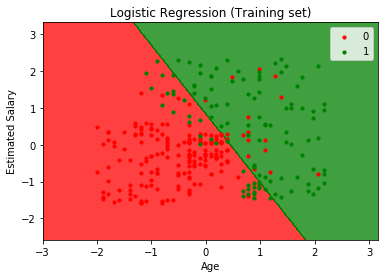

In [107]:
# Visualising the Training set result
from matplotlib.colors import ListedColormap
xSet, ySet = xTrain, yTrain
x1, x2 = np.meshgrid(np.arange(start = xSet[:, 0].min() - 1, stop = xSet[:, 0].max() + 1, step = 0.01),
                     np.arange(start = xSet[:, 1].min() - 1, stop = xSet[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(ySet)):
    plt.scatter(xSet[ySet == j, 0], xSet[ySet == j, 1], s = 10,
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

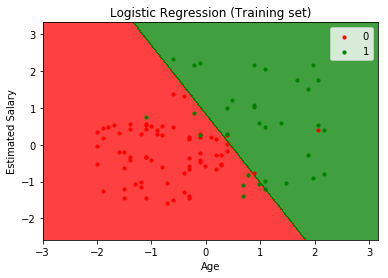

In [108]:
# Visualising the Test set result
from matplotlib.colors import ListedColormap
xSet, ySet = xTest, yTest
x1, x2 = np.meshgrid(np.arange(start = xSet[:, 0].min() - 1, stop = xSet[:, 0].max() + 1, step = 0.01),
                     np.arange(start = xSet[:, 1].min() - 1, stop = xSet[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(ySet)):
    plt.scatter(xSet[ySet == j, 0], xSet[ySet == j, 1], s = 10,
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()